<a href="https://colab.research.google.com/github/MekaSaiKrishna/MekaSaiKrishna.github.io/blob/main/Homework_1_ECE595.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework-1 : Due Jan 28, 4:59PM

Question-1: Histogram and Cross-Validation

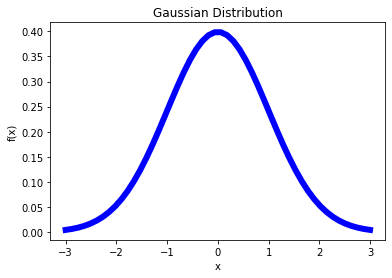

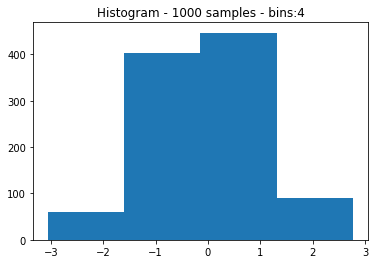

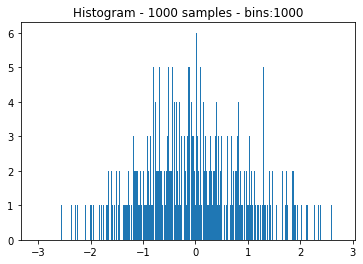



-0.045256707490195384


0.9870331586690257




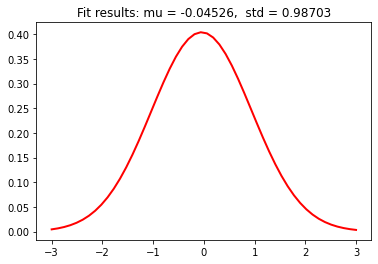

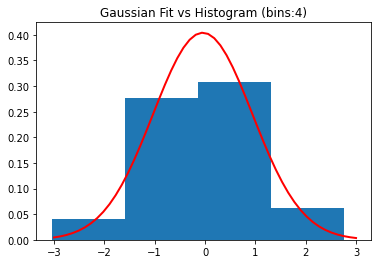

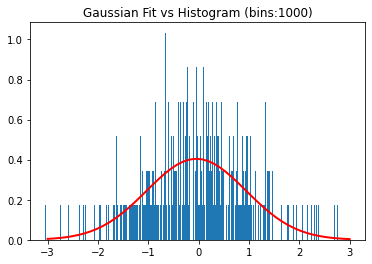

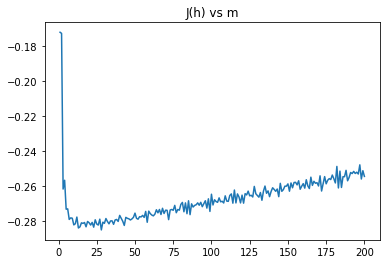



28




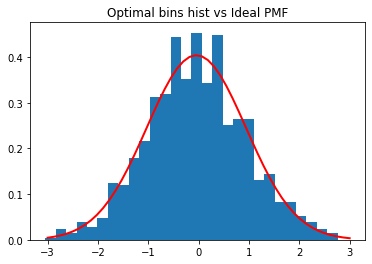

In [ ]:
#Question-1

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 

mu = 0
sigma=1

x = np.linspace(-3,3)
y = (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-0.5*((x-mu)/sigma)**2)

#y=1/(1+np.exp(-5*x+5))

# PART - (A)
plt.plot(x,y,'b',linewidth=6)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gaussian Distribution')
plt.savefig("Q1_Plot1.png")
plt.show()
print("\n")

# PART - (B)
#(i) Draw 1000 random samples from N(0,1)
N = 1000 #number of samples i.e. size
np.random.seed(0)
arr1 = np.random.normal(mu, sigma, size=N)

#(ii) Histogram Plot, bins=4
plt.hist(arr1, bins=4)
plt.title("Histogram - 1000 samples - bins:4")
plt.savefig("Q1PB_bins4.png")
plt.show()
print("\n")

#     Histogram Plot, bins=1000
plt.hist(arr1, bins=1000)
plt.title("Histogram - 1000 samples - bins:1000")
plt.savefig("Q1PB_bins1000.png")
plt.show()
print("\n")

#(iii) Mean and Std.Devn 
mu1, std1 = norm.fit(arr1)
#mu_2 = np.mean(arr1)
#std_2= np.std(arr1)
print(mu1)
print("\n")
print(std1)
print("\n")

#(iv)Gaussian Curve
#xmin, xmax = plt.xlim()
#x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu1, std1)
plt.plot(x, p, 'r', linewidth=2)
title = "Fit results: mu = %.5f,  std = %.5f" % (mu1, std1)
plt.title(title)
plt.savefig("Q1_fittedGauss.png")
plt.show()
print("\n")

#(iv) Part-2
plt.hist(arr1, bins=4, density=True)
#density=True : each bin will display the bin's raw count divided by
# the total number of counts and the bin width (density = counts / (sum(counts) * np.diff(bins))), 
# so that the area under the histogram integrates to 1 (np.sum(density * np.diff(bins)) == 1).
plt.plot(x, p, 'r', linewidth=2)
plt.title("Gaussian Fit vs Histogram (bins:4)")
plt.savefig("Q1_fitvshist4.png")
plt.show()
print("\n")

plt.hist(arr1, bins=1000, density=True)
plt.plot(x, p, 'r', linewidth=2)
plt.title("Gaussian Fit vs Histogram (bins:1000)")
plt.savefig("Q1_fitvshist1000.png")
plt.show()
print("\n")

#PART - C: Cross Validation Estimator of Risk

# n = total number of samples
# m = number of bins
# h = bin width == (max data value - min data value)/m

m = np.arange(1,201)
J = np.zeros((200))
for i in range(0,200):
 hist, bins = np.histogram(arr1, bins=m[i])
 max = np.amax(arr1)
 min = np.amin(arr1)
 h = (max-min)/m[i]
 J[i] = (2/((N-1)*h)) -((N+1)/(h*(N-1)))*np.sum((hist/N)**2)

plt.plot(m,J)
plt.title("J(h) vs m")
plt.show()
print("\n")

#(ii) Find m that minimizes J(h)
mstar = m[np.argmin(J)]
print(mstar)
print("\n")

#(iii) Plot New Histogram with Optimal Bins
plt.hist(arr1, bins=mstar, density=True)
plt.plot(x, p, 'r', linewidth=2)
plt.title("Optimal bins hist vs Ideal PMF")
plt.show()
print("\n")

Question-2: Gaussian Whitening

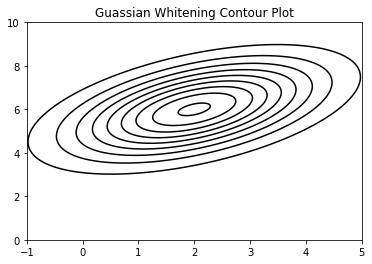

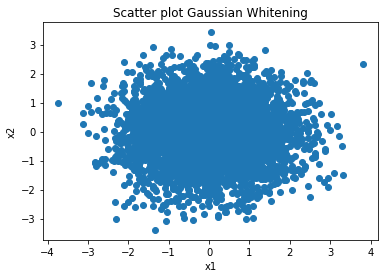



(5000, 2)


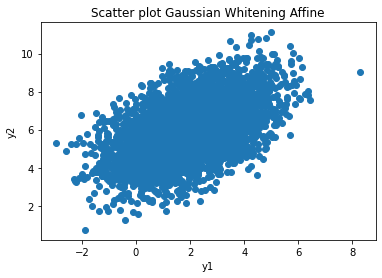



[0.70710678 0.70710678]
[3. 1.]
----------
[[ 1.22474487 -0.70710678]
 [ 1.22474487  0.70710678]]
[[2. 1.]
 [1. 2.]]
----------
[[ 1.22474487  0.70710678]
 [ 1.22474487 -0.70710678]]
[[2. 1.]
 [1. 2.]]
----------


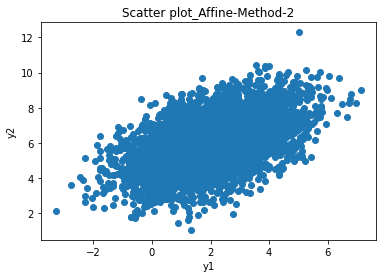

In [64]:
import numpy as np
from numpy import matlib as mb
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.linalg import fractional_matrix_power

#Part-A 

def f(x1,x2):
  return (1/np.sqrt(12*(np.pi)**2))*np.exp((x1*x2 + 10*x2 - 2*x1 - x1**2 - x2**2 - 28)/3) 

x1 = np.linspace(-1,5,num=1000)
x2 = np.linspace(0,10,num=1000)

X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)
plt.contour(X1, X2, Z, 10, colors='black')
plt.title("Guassian Whitening Contour Plot")
plt.savefig("contourplot.png")
plt.show()
print("\n")

#Part-C
#(i)Draw 5000 random samples from standard normal distribution
np.random.seed(0)
x = np.random.multivariate_normal([0,0],[[1,0],[0,1]],5000)
plt.scatter(x[:,0],x[:,1])  #x[:,0] - all rows of first column
plt.title("Scatter plot Gaussian Whitening")
plt.xlabel("x1")
plt.ylabel("x2")
plt.savefig("GaussianWhitening_Scatter.png")
plt.show()
print("\n")

#(ii)Applying affine transformation
A = np.sqrt(0.5)*np.array([[np.sqrt(3),1],[np.sqrt(3),-1]])
b = np.array([2,6])

y = np.dot(A, x.T) + mb.repmat(b,5000,1).T

Y= y.T
print(Y.shape)
plt.scatter(Y[:,0],Y[:,1])  #Y[]:,0] - all rows of first column
plt.title("Scatter plot Gaussian Whitening Affine")
plt.xlabel("y1")
plt.ylabel("y2")
plt.savefig("GaussianWhitening_Scatter_Affine.png")
plt.show()
print("\n")

#(iii)Finding A using Eigen Values and Eigen Vectors
Cov_Y = np.array([[2,1],[1,2]])
lamb, u = LA.eig(Cov_Y)
print(u[:,0])
print(lamb)
LAMB = np.array([[3,0],[0,1]])
U = np.stack((u[:,0], u[:,1]), axis=-1)
Astar = np.dot(U, fractional_matrix_power(LAMB,0.5))
#A found using Eigen Values and Eigen Vectors
print("----------")
print(Astar)
 #Verifying if A*AT=CovY is satisfied
print(np.dot(Astar,Astar.T))
print("----------")
#A found using hand calculation
print(A)
 #Verifying if A*AT=CovY is satisfied
print(np.dot(A,A.T))
print("----------")

#Corresponding Scatter Plot:
#y2 = np.dot(Astar, x.T) + mb.repmat(b,5000,1).T
#Y2= y2.T
#plt.scatter(Y2[:,0],Y2[:,1])  #Y[]:,0] - all rows of first column
#plt.title("Scatter plot_Affine-Method-2")
#plt.xlabel("y1")
#plt.ylabel("y2")
#plt.savefig("GaussianWhitening_Scatter_Affine_2.png")
#plt.show()
#print("\n")


Question-3: Linear Regression

In [ ]:
#Question - 3: Linear Regression

import numpy as np
from numpy import linalg as LA
from scipy.special import eval_legendre
import matplotlib.pyplot as plt
from scipy.optimize import linprog

N = 50
x = np.linspace(-1,1,N) 
L = np.zeros((N,5))

# Legendre Polynomial
for i in range(5):
  K = eval_legendre(i,x)    # evaluate 'i'th order legendre polynomial for x
  L[:,i]=K                  # L[:,i] is 'i'th order legendre polynomial 

b = np.array([-0.001, 0.01, 0.55, 1.5, 1.2])   #polynomial coefficients

mu = 0
sigma = 0.2
np.random.seed(0)
e = np.random.normal(mu, sigma, size=N)
y = b[0]*L[:,0] + b[1]*L[:,1] + b[2]*L[:,2] + b[3]*L[:,3] + b[4]*L[:,4] + e
 
print("\n")

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Scatter Plot of Legendre Polynomial")
plt.savefig("Ex3_(a)Scatter.png")
plt.show()
print("\n")

# Rank of L matrix
r = LA.matrix_rank(L)
print(r)
print("\n")

#(c) Predicted curve
b_hat = LA.lstsq(L, y, rcond=None)[0]
y_hat = np.dot(L,b_hat)

print(b_hat)
print("\n")

plt.plot(x,y, 'o', markersize=12)
plt.plot(x, y_hat, linewidth=6)
plt.title('Predicted fit without Outliers')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("Ex3_(c)PredFitwithoutOutliers.png")
plt.show()
print("\n")

#(d) Outliers
idx = [10, 16, 23, 37, 45]  # locations of outliers
y[idx] = 5                  # set the outliers to have a value 5

print("\n")

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Scatter Plot of Legendre Polynomial with Outliers")
plt.savefig("Ex3_(d)ScatterWithOutliers.png")
plt.show()
print("\n")

#Predicting Fit /with outliers
b_hat_new = LA.lstsq(L, y, rcond=None)[0]
y_hat_new = np.dot(L,b_hat_new)

print(b_hat_new)
print("\n")

plt.plot(x,y, 'o', markersize=12)
plt.plot(x, y_hat_new, linewidth=6)
plt.title('Predicted fit with Outliers')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("Ex3_(c)PredFitwithOutliers.png")
plt.show()
print("\n")

#(f) Linear Programming
X_lin = L
A_lin = np.vstack((np.hstack((X_lin, -np.eye(N))), np.hstack((-X_lin, -np.eye(N)))))
c_lin = np.hstack((np.zeros(5), np.ones(N)))
b_lin = np.hstack((y, -y))
res = linprog(c_lin, A_lin, b_lin, bounds=(None,None), method="revised simplex")

x_lin = res.x

beta_lin = x_lin[0:5]

print((beta_lin))

t = np.linspace(-1,1,N)
y_hat_new = np.dot(L,b_hat_new)


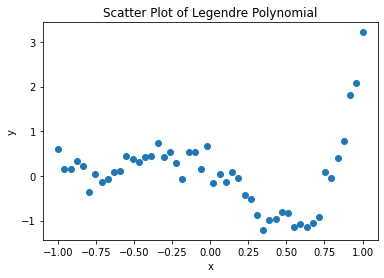



5


[ 0.0257496  -0.12714475  0.57698169  1.43347572  1.23799649]




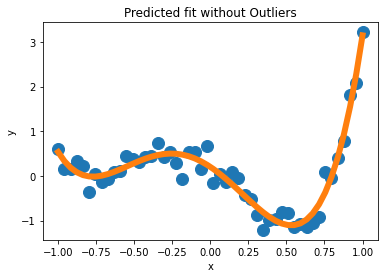

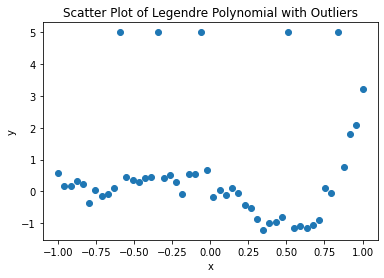



[ 0.52726253 -0.0212694   0.41220354  1.72450413  0.79896783]




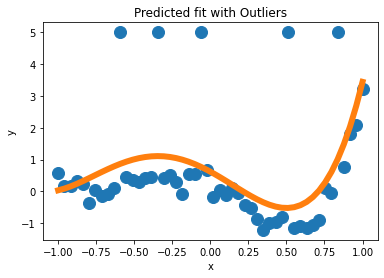



[ 0.03878408 -0.14374145  0.56700951  1.45606219  1.29833762]


In [ ]:
#Question - 3: Linear Regression

import numpy as np
from numpy import linalg as LA
from scipy.special import eval_legendre
import matplotlib.pyplot as plt
from scipy.optimize import linprog

N = 50
x = np.linspace(-1,1,N) 
L = np.zeros((N,5))

# Legendre Polynomial
for i in range(5):
  K = eval_legendre(i,x)    # evaluate 'i'th order legendre polynomial for x
  L[:,i]=K                  # L[:,i] is 'i'th order legendre polynomial 

b = np.array([-0.001, 0.01, 0.55, 1.5, 1.2])   #polynomial coefficients

mu = 0
sigma = 0.2
np.random.seed(0)
e = np.random.normal(mu, sigma, size=N)
y = b[0]*L[:,0] + b[1]*L[:,1] + b[2]*L[:,2] + b[3]*L[:,3] + b[4]*L[:,4] + e
 
print("\n")

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Scatter Plot of Legendre Polynomial")
plt.savefig("Ex3_(a)Scatter.png")
plt.show()
print("\n")

# Rank of L matrix
r = LA.matrix_rank(L)
print(r)
print("\n")

#(c) Predicted curve
b_hat = LA.lstsq(L, y, rcond=None)[0]
y_hat = np.dot(L,b_hat)

print(b_hat)
print("\n")

plt.plot(x,y, 'o', markersize=12)
plt.plot(x, y_hat, linewidth=6)
plt.title('Predicted fit without Outliers')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("Ex3_(c)PredFitwithoutOutliers.png")
plt.show()
print("\n")

#(d) Outliers
idx = [10, 16, 23, 37, 45]  # locations of outliers
y[idx] = 5                  # set the outliers to have a value 5

print("\n")

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Scatter Plot of Legendre Polynomial with Outliers")
plt.savefig("Ex3_(d)ScatterWithOutliers.png")
plt.show()
print("\n")

#Predicting Fit /with outliers
b_hat_new = LA.lstsq(L, y, rcond=None)[0]
y_hat_new = np.dot(L,b_hat_new)

print(b_hat_new)
print("\n")

plt.plot(x,y, 'o', markersize=12)
plt.plot(x, y_hat_new, linewidth=6)
plt.title('Predicted fit with Outliers')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("Ex3_(c)PredFitwithOutliers.png")
plt.show()
print("\n")

#(f) Linear Programming
X_lin = L
A_lin = np.vstack((np.hstack((X_lin, -np.eye(N))), np.hstack((-X_lin, -np.eye(N)))))
c_lin = np.hstack((np.zeros(5), np.ones(N)))
b_lin = np.hstack((y, -y))
res = linprog(c_lin, A_lin, b_lin, bounds=(None,None), method="revised simplex")

x_lin = res.x

beta_lin = x_lin[0:5]

print((beta_lin))

t = np.linspace(-1,1,N)
y_hat_new = np.dot(L,b_hat_new)


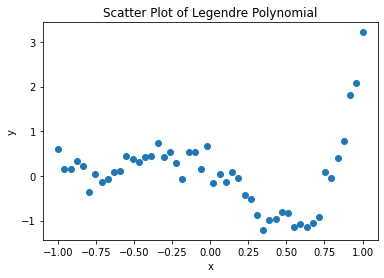



5


[ 0.0257496  -0.12714475  0.57698169  1.43347572  1.23799649]




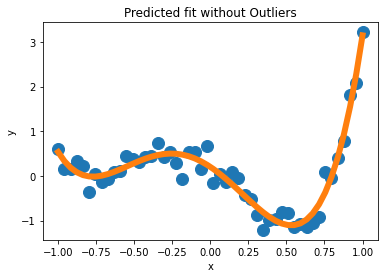

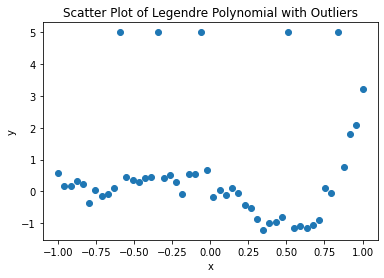



[ 0.52726253 -0.0212694   0.41220354  1.72450413  0.79896783]




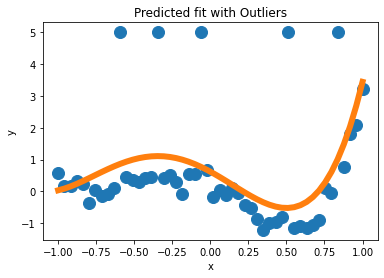



[ 0.03878408 -0.14374145  0.56700951  1.45606219  1.29833762]




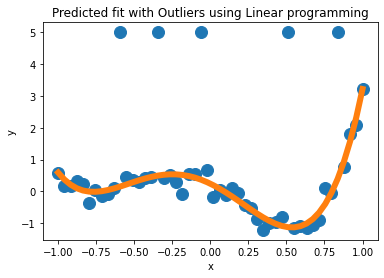

In [ ]:
#Question - 3: Linear Regression

import numpy as np
from numpy import linalg as LA
from scipy.special import eval_legendre
import matplotlib.pyplot as plt
from scipy.optimize import linprog

N = 50
x = np.linspace(-1,1,N) 
L = np.zeros((N,5))

# Legendre Polynomial
for i in range(5):
  K = eval_legendre(i,x)    # evaluate 'i'th order legendre polynomial for x
  L[:,i]=K                  # L[:,i] is 'i'th order legendre polynomial 

b = np.array([-0.001, 0.01, 0.55, 1.5, 1.2])   #polynomial coefficients

mu = 0
sigma = 0.2
np.random.seed(0)
e = np.random.normal(mu, sigma, size=N)
y = b[0]*L[:,0] + b[1]*L[:,1] + b[2]*L[:,2] + b[3]*L[:,3] + b[4]*L[:,4] + e
 
print("\n")

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Scatter Plot of Legendre Polynomial")
plt.savefig("Ex3_(a)Scatter.png")
plt.show()
print("\n")

# Rank of L matrix
r = LA.matrix_rank(L)
print(r)
print("\n")

#(c) Predicted curve
b_hat = LA.lstsq(L, y, rcond=None)[0]
y_hat = np.dot(L,b_hat)

print(b_hat)
print("\n")

plt.plot(x,y, 'o', markersize=12)
plt.plot(x, y_hat, linewidth=6)
plt.title('Predicted fit without Outliers')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("Ex3_(c)PredFitwithoutOutliers.png")
plt.show()
print("\n")

#(d) Outliers
idx = [10, 16, 23, 37, 45]  # locations of outliers
y[idx] = 5                  # set the outliers to have a value 5

print("\n")

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Scatter Plot of Legendre Polynomial with Outliers")
plt.savefig("Ex3_(d)ScatterWithOutliers.png")
plt.show()
print("\n")

#Predicting Fit /with outliers
b_hat_new = LA.lstsq(L, y, rcond=None)[0]
y_hat_new = np.dot(L,b_hat_new)

print(b_hat_new)
print("\n")

plt.plot(x,y, 'o', markersize=12)
plt.plot(x, y_hat_new, linewidth=6)
plt.title('Predicted fit with Outliers')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("Ex3_(c)PredFitwithOutliers.png")
plt.show()
print("\n")

#(f) Linear Programming
X_lin = L
A_lin = np.vstack((np.hstack((X_lin, -np.eye(N))), np.hstack((-X_lin, -np.eye(N)))))
c_lin = np.hstack((np.zeros(5), np.ones(N)))
b_lin = np.hstack((y, -y))
res = linprog(c_lin, A_lin, b_lin, bounds=(None,None), method="revised simplex")

x_lin = res.x

beta_lin = x_lin[0:5]

print((beta_lin))
print("\n")

t = np.linspace(-1,1,N)
y_hat_lin = np.dot(L,beta_lin)

plt.plot(t,y, 'o', markersize=12)
plt.plot(t, y_hat_lin, linewidth=6)
plt.title('Predicted fit with Outliers using Linear programming')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("Ex3_(f)PredFitwithOutliersLinProg.png")
plt.show()
print("\n")